In [ ]:
# 購物籃分析 market basket analysis

In [ ]:
## 載入套件與讀入資料

In [ ]:
### 載入套件

In [1]:
# import the needed librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting

import seaborn as sns

from itertools import combinations, groupby
from collections import Counter

In [28]:
'''
圖形中有中文字型的問題
參考
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/359974/
'''
from matplotlib.font_manager import FontProperties

han_font = FontProperties(fname=r"c:/windows/fonts/msjh.ttc", size=14) # 中文字形

In [29]:
'''
設計圖形呈現的外觀風格
'''
sns.set(style="whitegrid")

In [ ]:
### 讀入資料

In [32]:
order_products = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [ ]:
### 查看資料

In [6]:
order_products.shape

(1384617, 4)

In [7]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [33]:
order_products = order_products[['order_id', 'product_id']]

In [34]:
order_products.head()

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [35]:
print('dimensions: {0};   unique_orders: {1};   unique_products: {1}'
      .format(order_products.shape, order_products.order_id.nunique(),
              order_products.product_id.nunique()))

dimensions: (1384617, 2);   unique_orders: 131209;   unique_items: 131209


In [13]:
print("Starting order_products: {:22d}".format(len(order_products)))

Starting order_item:                1384617


In [41]:
# Calculate product frequency
product_freq = order_products.groupby("product_id")\
.order_id.count()\
.reset_index()\
.rename(columns={"order_id": "freq"})\
.sort_values("freq", ascending=False)

In [42]:
product_freq.head()

,product_id,freq
19574,24852,18726
10367,13176,15480
16685,21137,10894
17300,21903,9784
37499,47626,8135


In [45]:
product_freq["support"] = product_freq["freq"] / order_products.order_id.nunique() * 100

In [46]:
product_freq.head()

,product_id,freq,support
19574,24852,18726,14.271887
10367,13176,15480,11.797971
16685,21137,10894,8.302784
17300,21903,9784,7.456806
37499,47626,8135,6.200032


In [25]:
# given min_support
min_support = 0.01

In [47]:
# Filter from order_item items below min support 
qualifying_products = product_freq[product_freq['support'] >= min_support].product_id
order_products = order_products[order_products.product_id.isin(qualifying_products)]

In [27]:
print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
print("Remaining order_products: {:21d}".format(len(order_products)))


Items with support >= 0.01:           11554
Remaining order_products:               1274989


In [ ]:
# order_products.index --> order_id
type(order_products.index)

In [30]:
order_size = freq(order_products.index)

In [31]:
# Filter from order_item orders with less than 2 items
qualifying_orders = order_size[order_size >= 2].index
order_products  = order_products[order_products.index.isin(qualifying_orders)]

In [20]:
print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
print("Remaining order_item: {:21d}".format(len(order_item)))


In [22]:
gr2 = gr1.groupby("product_id")\
.order_id.nunique().reset_index()\
.sort_values("product_id", ascending=True)

In [23]:
gr2 = gr2.assign(totals=gr2.product_id*gr2.order_id)

In [24]:
total_sum = gr2.totals.sum()

In [25]:
gr2 = gr2.assign(percent=gr2.totals/total_sum)

In [31]:
gr2 = gr2.assign(cum_percent=np.around(gr2.percent.cumsum()*100, decimals=2))

Text(0.5, 1.0, '訂單上商品數量的分布情形')

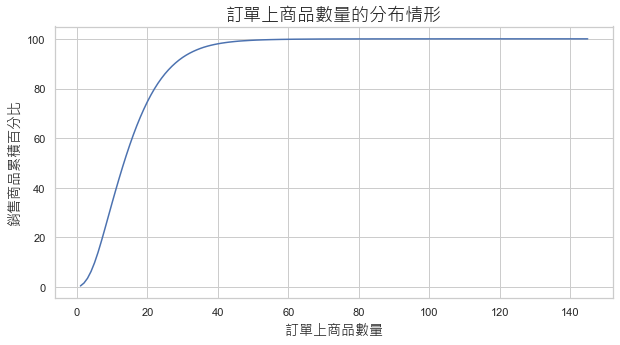

In [32]:
'''
選用線圖呈現訂單上商品數量的分布情形。
'''
plt.figure(figsize=[10, 5]) #圖的大小
ax = sns.lineplot(x="product_id", y="cum_percent", data=gr2)

ax.set_xlabel("訂單上商品數量", fontproperties=han_font) # x軸的標題，字型選用中文字型
ax.set_ylabel("銷售商品累積百分比", fontproperties=han_font)
ax.set_title('訂單上商品數量的分布情形', fontproperties=han_font, fontsize=18)

In [35]:
# 熱銷商品
gr3 = order_products_prior.groupby("product_name")\
.agg({'reordered': 'count'}).reset_index().sort_values("reordered", ascending=False)

gr3

,product_name,reordered
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584
...,...,...
36693,Pure Performance Restorative Shampoo Chamomile...,1
23454,Lindor Peppermint White Chocolate Truffles,1
13487,Dynostix Rawhide Chew With Meat,1
24644,Max White With Polishing Star Soft Toothbrush,1
